Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [16]:
NAME = ""
STUDENTID = ""
GROUPID = "";

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Required reading: Study the paper by Saket et al. (2019) and explicitly refer to the task types, pros & cons of different visualisations as identified by these authors when answering the questions on this assignment.
* The visualisation should be appropriate the chosen tasks on the data sets.
* You should use at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to choose a different visualisation for each. 
* As contrast to Assignment 2, you will be expected to use `pandas` to represent and to prepare the data sets for visualisation.
* As for the data sets collected during Assignment 2, to avoid confusion:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you have worked with excerpts (samples) from the original and genuine datasets, you can continue to use these. You are also free to use the complete datasets, but this is not expected.
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

In [1]:
#all my imports that i need for this code!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#We need to load the data from the data file
df = pd.read_csv("final_processed_data.csv")  

#I need to filter my data because i would like to compare them over a 5 year difference and I want to see any drastic difference
#first i do the dataframe from 2014
df2014 = df[df['year'] == 2014]

#since i am only looking at eli_pct and abmi_pct I will only keep those two columns
df2014 = df2014[['eli_pct', 'abmi_pct']]

#i cant use the rows if anything is missing because then i dont see the coorelation so i must drop the missing values
#citation for .dropna: https://www.w3schools.com/python/pandas/ref_df_dropna.asp
df2014 = df2014.dropna()

#secondly i take the dataframe from 2019
df2019 = df[df['year'] == 2019]

#same process - only extremely low income and above middle income.
df2019 = df2019[['eli_pct', 'abmi_pct']]

#removing any missing data
df2019 = df2019.dropna()

#here i want to calculate the pearson relationship to determite if there is a strong positive or negative relationship between two factors
#closer to 1 -> strong positive relationship between two factors
#closer to -1 -> strong negative relationship between two factors
#somewhere around 0 -> little or no relationship between two factors

#correlation for 2014 data
#citation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
r2014 = df2014['eli_pct'].corr(df2014['abmi_pct'])

#coorrelation for 2019 datat
r2019 = df2019['eli_pct'].corr(df2019['abmi_pct'])

#now i would like to make a linear regression (y = mx + b) to have a fitting line that i could put onto the data to visualize it 
#this is helpful for the overall relationship of eli and abmi 

#pearson correlation code -> it shows strength & direction of linear relationship for 2014
#source for .polyfit : https://data36.com/linear-regression-in-python-numpy-polyfit/
#i chose .polyfit because it seemed like the simplest ways of calculating it,
#others needed more line of code or they would do extra calculations which i dont need!
#save x data for 2014
x2014 = df2014['eli_pct']

#save y data for 2014
y2014 = df2014['abmi_pct']

#regression using .polyfit for 2014
regressionResult2014 = np.polyfit(x2014, y2014, 1)

#get slope and intercept
slope2014 = regressionResult2014[0]
intercept2014 = regressionResult2014[1]

#same is done for 2019
#saving x data for 2019
x2019 = df2019['eli_pct']

#saving y data for 2019
y2019 = df2019['abmi_pct']

#regression using .polyfit for 2019
regressionResult2019 = np.polyfit(x2019, y2019, 1)

#get slope and intercept
slope2019 = regressionResult2019[0]
intercept2019 = regressionResult2019[1]

# I want to have a straight regression line so i need to generate points for it
#i need to find the min and max values of eli pct across the yrs
#I wanted to use scipy but i was not sure if we are allowed to use it so i opted for the longer way (source: https://www.w3schools.com/python/python_ml_linear_regression.asp)
#source for learning about min and max:(https://realpython.com/python-min-and-max/)
min_eli = df['eli_pct'].min()
max_eli = df['eli_pct'].max()

#this records the two points that will be the start and the end of my line
#creating list with min and max values
xList = [min_eli, max_eli]

#converting that into a NumPy array
xVals = np.array(xList)

#calculating the y values for 2014 regression line
yVals2014 = slope2014 * xVals + intercept2014

#same for 2019 line
yVals2019 = slope2019 * xVals + intercept2019

##########code for actual visual plotting 

#Quick reasoning why i chose the following visualization: 
#“Line charts and scatterplots have significantly higher accuracy and speed for finding correlations” 
#and were the most effective visualizations for correlation tasks (Section 5, Table 1)." -> Harrison et al.
#more will be explained in the text below the code cell

#make two side-by-side subplots that will show 2014 and 2019 
#only this line of code made my graphs squished so i added another line below to make them look better
fig, axes = plt.subplots(1, 2)

#i needed something that regilates the size of the two subplots from 2014 and 2019 
#source for set_size_inches: http://geeksforgeeks.org/matplotlib-figure-figure-set_size_inches-in-python/
#it was really important that they were close to one another and yet big enough and not squished!
fig.set_size_inches(14, 6)

# code for the left plot (2014) 
# Scatter plot of the actual data!!

#if i have two subplots i have to pick the left subplots (hence axes[0])
leftPlot = axes[0]

#creating and decorating the plot 

#source:https://www.w3schools.com/python/matplotlib_scatter.asp (source for scatter)
#as it is easier for me to edit the code and look back to my stuff this is the structure i will stick to from now
leftPlot.scatter(
    
    #x axis data
    x2014, 
    
    #y axis data
    y2014,          
    
    #previously I did not have this line of code but i realized i need some transparrency because full color looked like a blob
    #just a matter of a better visualization
    alpha=0.5,           
    
    #color -> self explanators
    color='tab:green',
    
    #for the legend
    label='2014 Data'

)

#we already calculated regression line for 2014 -> so we are just gonna insert it here
#for .plot : (https://www.w3schools.com/python/matplotlib_plotting.asp)
leftPlot.plot(
    
    #min and max of eli
    xVals,   
    
    #y values for the regression line
    yVals2014,   
    
    #color
    color='black',
    
    #without this line of code i think the line was too thin so I addeed this
    linewidth=2,
    
    #for the legend -> .format is used only if there are curly brackets - otherwise the 2f curly bracket would show
    label='2014 Regression Line (r = {:.2f})'.format(r2014),
)

#show legend
leftPlot.legend()


# title, labels and color!
leftPlot.set_title("Relationship Between Very Low-Income and High-Income \n Household Distribution in 2014 in LA\nPearson Correlation = {:.2f}".format(r2014))

#x axis label -> decoding what eli is 
leftPlot.set_xlabel("Percentage of Very Low-Income Households")

#y axis label -> decoding what abmi is 
leftPlot.set_ylabel("Percentage of High-Income Households")

#limits must be set so that the plots are much cleaner!
leftPlot.set_xlim(0, 100)
leftPlot.set_ylim(0, 100)

#I added a grid as I prefer to have a clear layout and I want to trace the numbers easily. It is also easier to estimate numbers in between
leftPlot.grid(True)

# code for the right plot (2019)
# Scatter plot of the actual data!!

#if i have two subplots i have to pick the right subplot (hence axes[1])
rightPlot = axes[1]

#creating and decorating the plot 

#source:https://www.w3schools.com/python/matplotlib_scatter.asp (source for scatter)
#as it is easier for me to edit the code and look back to my stuff this is the structure i will stick to from now
rightPlot.scatter(
    
    #x axis data
    x2019, 
    
    #y axis data
    y2019,          
    
    #transparency for better visibility of overlapping points
    alpha=0.5,           
    
    #color of the points
    color='tab:red',
    
    #for the legend
    label='2019 Data'
)


#we already calculated regression line for 2019 -> so we are just gonna insert it here
#for .plot : (https://www.w3schools.com/python/matplotlib_plotting.asp)
rightPlot.plot(
    
    #min and max of eli
    xVals,   
    
    #y values for the regression line
    yVals2019,   
    
    #color
    color='black',
    
    #line width to make the regression line more visible
    linewidth=2,
    
    #for the legend
    label='2019 Regression Line (r = {:.2f})'.format(r2019)

)

#show legend
rightPlot.legend()

# title, labels and color!
rightPlot.set_title("Relationship Between Very Low-Income and High-Income \n Household Distribution in 2019 in LA\nPearson Correlation = {:.2f}".format(r2019))

#x axis label -> decoding what eli is 
rightPlot.set_xlabel("Percentage of Very Low-Income Households")

#y axis label -> decoding what abmi is 
rightPlot.set_ylabel("Percentage of High-Income Households")

#setting axis limits so the visual is clean
rightPlot.set_xlim(0, 100)
rightPlot.set_ylim(0, 100)

#grid for clearer reading and estimation between points
rightPlot.grid(True)


#combined plot (the third plot which contains both 2014 and 2019 data so that we can see clear difference)
plt.figure(figsize=(12, 8))

#the scatter plot for 2014 
plt.scatter(
    x2014,
    y2014,
    alpha=0.4,
    label=f'2014 Data (r={r_2014:.2f})',
    color='tab:green'
)

#scatter plot for 2019
plt.scatter(
    x2019,
    y2019,
    alpha=0.4,
    label=f'2019 Data (r={r_2019:.2f})',
    color='tab:red',
    #this is the only difference that i added because i need to be able to differenciate the data and i want to clearly see what is where
    marker='^'
)

# i plotted regression line with a dotted line because i wanted both of the graphs to show their regression lines and this would be clear 
#this helps us see if everything stayed 1:1 or changed!
plt.plot(
    x_vals, 
    yVals2014, 
    color='black', 
    linestyle='--', 
    linewidth=2, 
    label='2014 Regression Line')

# Regression line for 2019 (solid style)
plt.plot(
    x_vals, 
    yVals2019, 
    color='black', 
    linestyle='-', 
    linewidth=2, 
    label='2019 Regression Line')

#title and axis labels
plt.title('Comparison of the Distribution Relationship Between Very Low-Income and High-Income Households in Los Angeles (2014 & 2019)')
plt.xlabel("Percentage of Very Low-Income Households")
plt.ylabel("Percentage of High-Income Households")

#setting same limits as in the upper two graphs
plt.xlim(left=0)
plt.ylim(bottom=0)

#add the grid 
plt.grid(True, alpha=0.5)

#show legend
plt.legend()

#adjust the layout
#source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
#i was looking for something that would make sure nothing overlaps and everything stays clean and even
plt.tight_layout()
plt.show()



ModuleNotFoundError: No module named 'pandas'

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

1. According to Saket et al. (2019)
According to Saket et al. (2019) the task that is supported by our visualization in this task is called find coorelation. It asks viewers to find out whether a relationship exists between two numerical variables. In this case it is the percentage of very low income households that can be seen on the x axis and the percentage of high income households that can be seen on the y axis

Citation: "Find Correlation. For a given set of two data attributes, we asked participants to determine if there is a correlation between them. To verify the responses to correlation tasks, we computed Pearson’s correlation coefficient (r) to ensure that there was a strong correlation (r ≤ −0.7 or r ≥ 0.7) between the two data attributes. For example, is there a strong correlation between average budget and movie rating?" (Saket et al., 2019, p. 3).

We jave also computed the Persons coorelation coefficient to ensure that this even makes sense ! there indeed is a strong negative coorelation between the two factors as the valaue is -0.79


2. Why is the Chosen Visualization Effective?
The scatterplot is one of the top visualizations for the coorelation tasks based on the empirical results of Saket et al. They found out that “Line Chart and Scatterplot were significantly more accurate than other charts for finding correlations” (p. 5, Table 1).

Line chart did not really make sense for us for this task and coorelation , hence we have decided that scatteerplot is the best way as they show pairwise data points very clearly. Our goal was to see at the end if the data overlapped or if there were changes and we have indeed seen some slight change. The regression line became less steep but only by a fraction. It is small but there is a visible difference. The scatterplot helped me visualize direction , whether it is a positive or a negative direction and it also helped me see if it is a linear or a non linear relationship. Plotting a regression line helped me also visualize the trend and it also alligns with Saket et al. Therefore, it is abolutely justifyable why I have used scatterplots with regression lines, as it alligns with the data type as well as the provided research paper.

3. What the Visualization Shows
Our visualization shows:
1) a strong negative coorelation of r = -0.79 between the share of low income households and the share of high income households. The percentages of the household incomes do not sum to 100% because they represent competely different income brackets that were calculated independently instead of being mutually exlusive parts of a whole. This helps us test if areas with high propotion of higher level invome households tend to contain or to exclude lower income groups.
2) The regression line trend is shownn in 2014 and 2019 data, with minor changes. This is better visualized on the lower data graph.  
3) We can confidently say that there is a strong negative coorelation between the two factors proving that the societal norms did not change since 2014 and this societal phenomena stayed in palace. There is a clear pattern that shows that if there are more wealthy people in the area, there will be much less poorer people and vice versa.

4. What the Visualization Contributes to the Project
This question leads up to our main question in our third task , in the third code where we analyze the largest shift in the demographic in the living areas. We want to analyze if the crimes change with the demographic change. Is there a pattern if the main demographic relates to one of the classes? How did it change? 
Apart from that it shows that there is a clear coorelation and uneven distriution among the wealth classes in the living areas of LA, helping us visualize the demographic in certain areas and perhaps predict the crime outcome.
This visualization directly answers a core question of your project:
I personally was very interested to see if this tendency of a non equal living distribution changed over time, and I was surprised to see even slightest change - as it is only a 5 year difference. The difference in regression lines showed us that there was minimal but still change in this coorelation - it is slightly evening out (but on a micro level). It makes us question whether over a longer timespan there will be more change (for ecample in 30 years) and this also makes us question why the change in such short time , whether it is new societal norms or economic change.
It also gives us a clear representation that we can utilise for presentations and reports which was reccomended by Saket et al. for analytical and comparative tasks.



------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

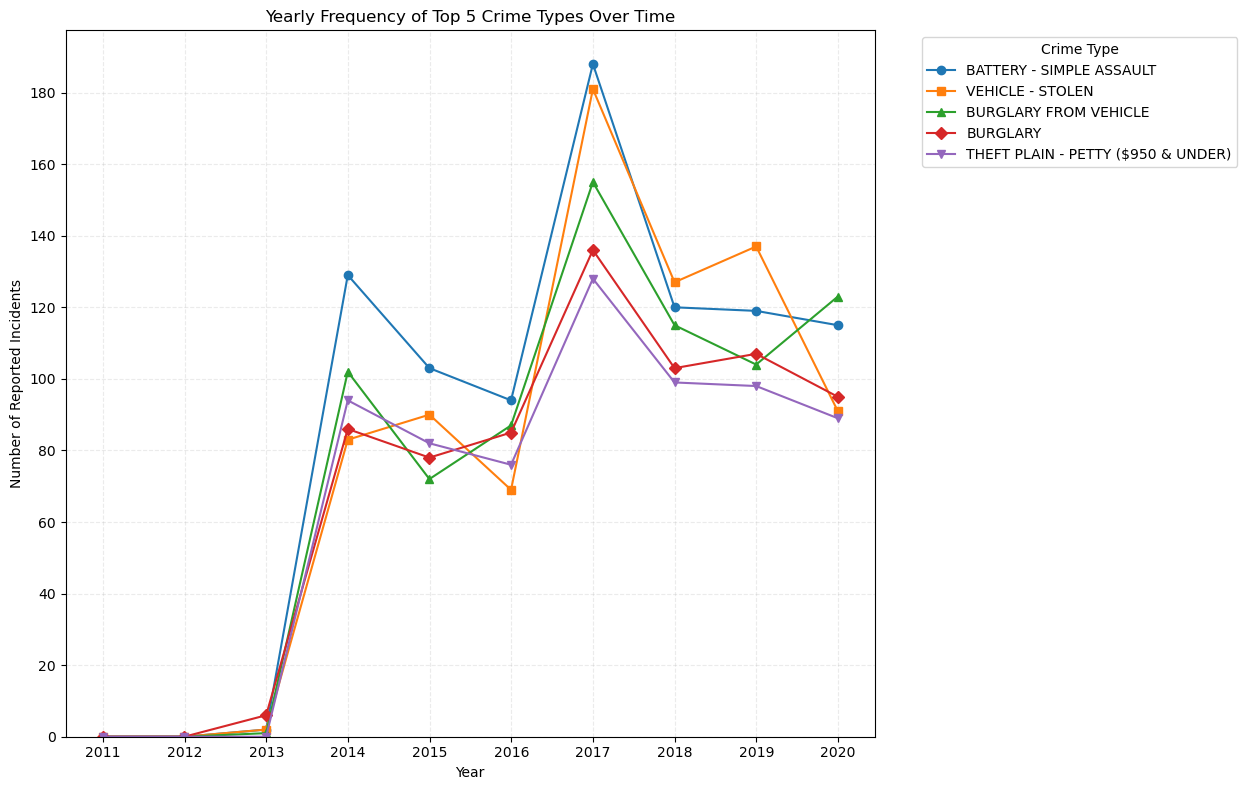

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

# Data Input/Output and Validation 

def load_json(filepath):
    
    """
    Load a JSON file into a pandas DataFrame.
    Raises FileNotFoundError if the file does not exist.
    """
    
    return pd.read_json(filepath)


def ensure_columns(df, cols):
    
    """
    Ensure that DataFrame df contains all column names in cols.
    Raises KeyError listing any missing columns.
    """
    
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise KeyError(f"Missing required columns: {missing}")


# Date Conversion & Range Extraction

def convert_and_filter_dates(df, date_col):
    
    """
    Convert df[date_col] to datetime, coercing errors to NaT.
    Drops rows where conversion failed.
    Returns (clean_df, min_date, max_date).
    Raises ValueError if no valid dates remain.
    """
    
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    valid = df.dropna(subset=[date_col])
    if valid.empty:
        raise ValueError(f"No valid dates in column '{date_col}'")
    return valid, valid[date_col].min(), valid[date_col].max()


# Top‑N Crime Extraction

def top_n_crimes(df, desc_col, n=5):
    
    """
    Compute the top-n most frequent values in df[desc_col].
    Returns a list of the top-n descriptions.
    Raises ValueError if desc_col is empty or all-NaN.
    """
    
    counts = df[desc_col].value_counts().dropna()
    if counts.empty:
        raise ValueError(f"No values found in '{desc_col}'")
    return counts.head(n).index.tolist()


# Aggregation & Pivoting

def aggregate_yearly_counts(df, date_col, desc_col, crime_list):
    
    """
    Group by year-end (freq='Y') and crime type, counting incidents.
    Returns a pivot table with DatetimeIndex of year-ends and one column per crime.
    Ensures all crime_list items appear as columns (zero-filled if absent).
    """
    
    #  Drop missing descriptions, set date index
    df = df.dropna(subset=[desc_col]).set_index(date_col)
    
    #  Filter to only the top crimes and count per year-end
    grouped = (
        df[df[desc_col].isin(crime_list)]
        .groupby([pd.Grouper(freq='Y'), desc_col])
        .size()
    )
    
    # Pivot to wide format, filling missing combinations with 0
    pivot = grouped.unstack(fill_value=0)
    
    # Reindex columns to match exactly the requested crime_list
    pivot = pivot.reindex(columns=crime_list, fill_value=0)
    return pivot


def reindex_yearly(pivot, start, end):
    
    """
    Reindex pivot to include every year-end between start & end.
    Missing years filled with zeros.
    """
    
    full_index = pd.date_range(start=start, end=end, freq='Y')
    return pivot.reindex(full_index, fill_value=0)


# Visualization 

def plot_crime_trends(pivot, crime_list):
    
    """
    Plot each crime’s yearly counts over time.
    Uses distinct markers, a legend to the right, and year‑only x‑axis.
    """
    
    fig, ax = plt.subplots(figsize=(15, 8))
    markers = ['o', 's', '^', 'D', 'v']
    for i, crime in enumerate(crime_list):
        ax.plot(
            pivot.index,
            pivot[crime],
            marker=markers[i % len(markers)],
            linewidth=1.5,
            label=crime
        )

    ax.set_title("Yearly Frequency of Top 5 Crime Types Over Time")
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Reported Incidents")
    ax.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.25)
    ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    ax.set_ylim(0, None)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=0)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


#  Main Execution Flow 

def main():
    data_folder = "data"
    filename    = "data_notebook-notebook-1_dataset2.json"
    filepath    = os.path.join(data_folder, filename)

    try:
        # Load & validate
        df_raw = load_json(filepath)
        ensure_columns(df_raw, ['crm_cd_desc', 'date_occ'])

        # Convert dates & extract range
        df_dates, min_dt, max_dt = convert_and_filter_dates(df_raw, 'date_occ')

        # Identify top‑5 crimes over full range
        top5 = top_n_crimes(df_dates, 'crm_cd_desc', n=5)

        # Aggregate and pivot
        pivot = aggregate_yearly_counts(df_dates, 'date_occ', 'crm_cd_desc', top5)
        pivot = reindex_yearly(pivot, min_dt, max_dt)

        # Plot
        plot_crime_trends(pivot, top5)

    except FileNotFoundError:
        print(f"[ERROR] File not found: {filepath}")
    except KeyError as ke:
        print(f"[ERROR] {ke}")
    except ValueError as ve:
        print(f"[ERROR] {ve}")
    except Exception as e:
        print(f"[UNEXPECTED ERROR] {e}")
        traceback.print_exc()


if __name__ == "__main__":
    main()


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

We classify our visualization as a Characterize Distribution task: we want to see how the annual counts of the top 5 crime types are distributed over the years 2010–2019.

We chose a line chart because Saket et al. report that line charts outperform bar charts, scatterplots, tables, and pie charts on Distribution tasks—line charts use position along a common axis, which makes it easy for us to compare exact values and trends across multiple series.

We plot five distinct colored lines—one per crime type—along the x‑axis (years 2010–2019) against the y‑axis (number of incidents). This lets us read, for example, that Battery – Simple Assault climbs from about 95 incidents in 2013 to about 188 in 2017, while Vehicle – Stolen and Burglary from Vehicle follow their own rise‑and‑fall patterns.

 By mapping out when and how each major crime category spikes or declines, we can align these crime trends with the socioeconomic shifts we observed in our income‑group analysis. That alignment allows us to test hypotheses about how changes in community wealth or poverty levels relate to changes in crime patterns.

-----
## Step 3  (7 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

Starting streamlined script...
Top 5 tracts by financial change: ['06037207400', '06037980011', '06037434004', '06037297601', '06037294110']
Loaded 10000 crimes, joined → 10000 records


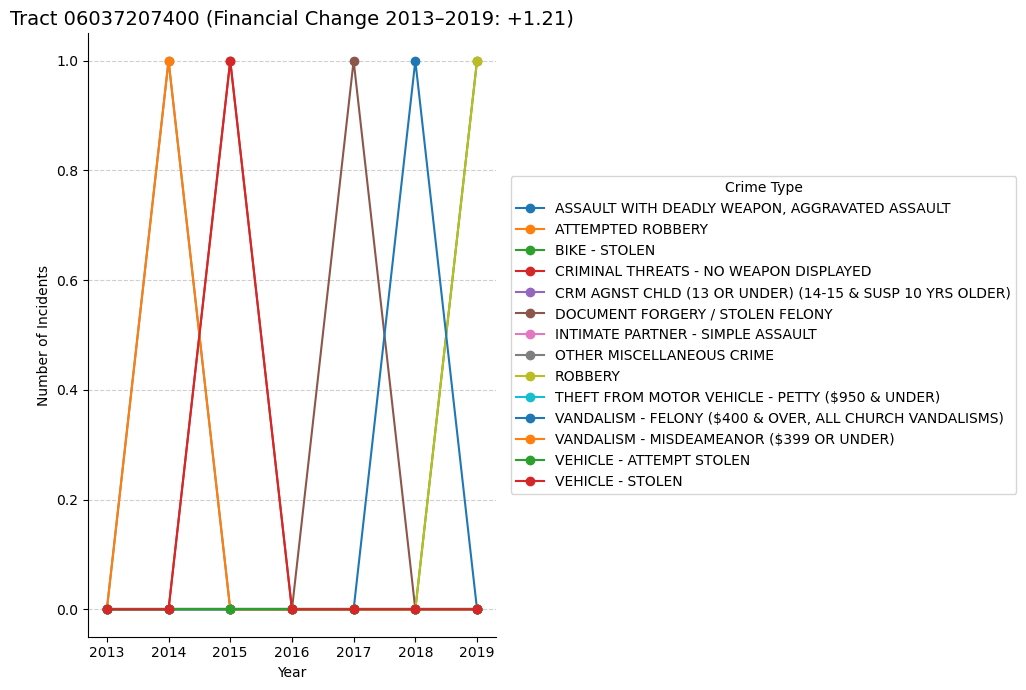

Skipping 06037980011: no crime data.
Skipping 06037434004: no crime data.


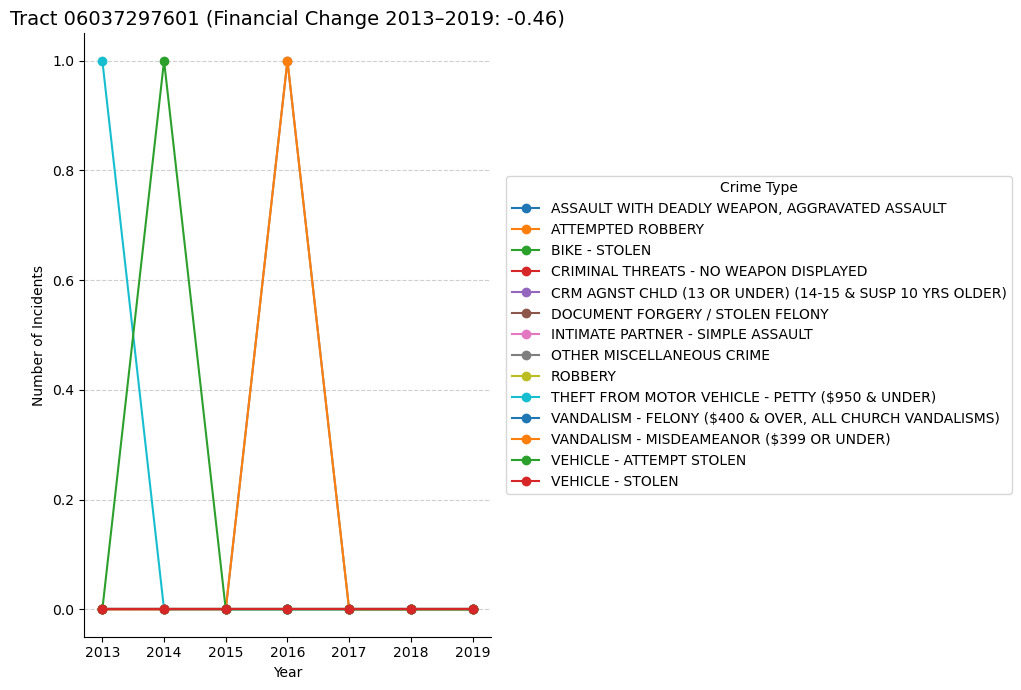

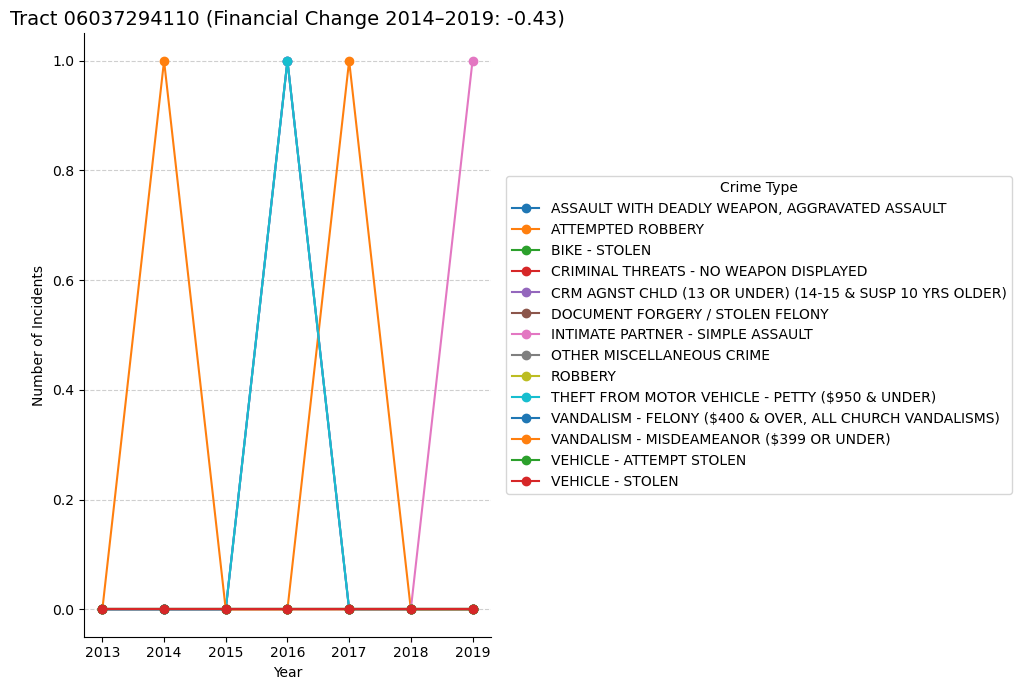

Script finished.


In [9]:
import json
import pathlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


# Configuration

CWD                = pathlib.Path(os.getcwd())
DATA_DIR           = CWD / "data"
CRIME_JSON_PATH    = DATA_DIR / "data_notebook-notebook-1_dataset2.json"
CENTROIDS_CSV_PATH = DATA_DIR / "CA_tract_centroids_2020.csv.txt"
INCOME_CSV_PATH    = DATA_DIR / "data_notebook-notebook-1_dataset1.csv"
PROJECTED_CRS      = "EPSG:3310"            # California Albers
NUM_TOP_TRACTS     = 5
YEARS_TO_PLOT      = list(range(2013, 2020))

if not DATA_DIR.is_dir():
    raise FileNotFoundError(f"Data directory {DATA_DIR} not found.")



#  Financial Scores & Top-Changing Tracts

def load_centroids(path: pathlib.Path) -> pd.DataFrame:
    
    """
    Load census tract centroids, build a 11-digit GEOID string,
    and return a lookup DataFrame with geoid, LATITUDE, and LONGITUDE.
    """
    
    df = pd.read_csv(path, dtype=str)
    df['geoid'] = df['STATEFP'].str.zfill(2) \
                + df['COUNTYFP'].str.zfill(3) \
                + df['TRACTCE'].str.zfill(6)
    return df[['geoid', 'LATITUDE', 'LONGITUDE']].copy()


def compute_top_changing_tracts(path: pathlib.Path, n: int) -> pd.DataFrame:
    
    """
    1. Read income CSV.
    2. Compute exclusive income-group shares.
    3. Build a weighted financial score.
    4. Compute change between each tract’s first and last year.
    5. Return top-n tracts by absolute change, indexed by cleaned geoid,
       with columns [first_year, last_year, change].
    """
    
    df = pd.read_csv(path)
    
    # Exclusive group shares
    
    df['ex_eli_pct' ] = df['eli_pct']
    df['ex_vli_pct' ] = df['vli_pct']  - df['eli_pct']
    df['ex_li_pct'  ] = df['li_pct']  - df['vli_pct']
    df['ex_mi_pct'  ] = df['mi_pct']  - df['li_pct']
    df['ex_abmi_pct'] = df['abmi_pct']
    
    # Weighted score: from -1 (all ELI) to +1 (all ABMI)
    
    weights = {'ex_eli_pct': -1.0, 'ex_vli_pct': -0.5,
               'ex_li_pct':  0.0, 'ex_mi_pct':  0.5,
               'ex_abmi_pct': 1.0}
    df['financial_score'] = sum(df[col] * w for col, w in weights.items()) / 100

    # Clean and sort by tract and year
    
    df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)
    df = df.sort_values(['geoid', 'year'])
    # First & last score per tract
    
    first = df.loc[df.groupby('geoid')['year'].idxmin()]
    last  = df.loc[df.groupby('geoid')['year'].idxmax()]
    merged = pd.merge(
        first[['geoid','financial_score','year']].rename(columns={
            'financial_score':'first_score','year':'first_year'
        }),
        last [['geoid','financial_score','year']].rename(columns={
            'financial_score':'last_score','year':'last_year'
        }),
        on='geoid'
    )
    # Exclude tracts with only one year of data
    
    merged = merged[merged['first_year'] != merged['last_year']].copy()
    merged['change'] = merged['last_score'] - merged['first_score']

    # Select top-n by absolute change
    
    merged = merged.reindex(
        merged['change'].abs().sort_values(ascending=False).index
    ).head(n)

    # Clean up GEOID (ensure exactly 11 digits)
    
    merged['geoid'] = merged['geoid'].astype(str).str.extract(r'(\d{11})')[0]
    return merged.set_index('geoid')[['first_year','last_year','change']]



# Crime Data + Spatial Join

def load_and_clean_crime_json(path: pathlib.Path) -> pd.DataFrame:
    
    """
    Read a JSON (or newline‑delimited JSON) of crime records,
    lowercase column names, convert lat/lon to numeric, and drop invalid coords.
    """
    
    with open(path, 'r') as f:
        try:
            data = json.load(f)
        except json.JSONDecodeError:
            data = [json.loads(line) for line in f if line.strip()]

    df = pd.DataFrame(data)
    
    # Standardize and clean coordinates
    
    df.rename(columns=str.lower, inplace=True)
    df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
    df['lon'] = pd.to_numeric(df['lon'], errors='coerce')
    return df.dropna(subset=['lat','lon'])


def spatially_join_crime_to_tracts(
    crime_df: pd.DataFrame,
    centroids_df: pd.DataFrame
) -> gpd.GeoDataFrame:
    
    """
    1. Build GeoDataFrames for crimes and tract centroids.
    2. Reproject both to PROJECTED_CRS.
    3. Perform a nearest‑neighbor spatial join to tag each crime with its tract GEOID.
    """
    
    # Create GeoDataFrames in WGS84
    crime_gdf     = gpd.GeoDataFrame(
        crime_df,
        geometry=gpd.points_from_xy(crime_df.lon, crime_df.lat),
        crs="EPSG:4326"
    )
    centroids_gdf = gpd.GeoDataFrame(
        centroids_df,
        geometry=gpd.points_from_xy(
            centroids_df.LONGITUDE, centroids_df.LATITUDE
        ),
        crs="EPSG:4326"
    )

    # Reproject both
    crime_proj     = crime_gdf.to_crs(PROJECTED_CRS)
    centroids_proj = centroids_gdf.to_crs(PROJECTED_CRS).reset_index(drop=True)

    # Nearest‑neighbor join (adds index_right)
    joined = gpd.sjoin_nearest(
        crime_proj,
        centroids_proj[['geometry']],
        how='left'
    )
    # Merge in the geoid from centroids
    return joined.merge(
        centroids_proj[['geoid']],
        left_on='index_right',
        right_index=True,
        how='left'
    )



# Pivot & Plot per Tract

def prepare_crime_counts(
    gdf: gpd.GeoDataFrame,
    top_geoids: list
) -> pd.DataFrame:
    
    """
    1. Parse date_occ to datetime, drop invalids, extract year.
    2. Filter to only the specified top_geoids.
    3. Fill missing descriptions and count incidents per (geoid,year,crm_cd_desc).
    4. Pivot to a wide table indexed by [geoid, year].
    """
    
    df = gdf.copy()
    df['date_occ'] = pd.to_datetime(df['date_occ'], errors='coerce')
    df = df.dropna(subset=['date_occ'])
    df['year'] = df['date_occ'].dt.year
    df['crm_cd_desc'] = df['crm_cd_desc'].fillna('UNKNOWN').str.strip()
    df = df[df['geoid'].isin(top_geoids)]

    grouped = (
        df.groupby(['geoid', 'year', 'crm_cd_desc'])
          .size()
          .reset_index(name='count')
    )
    pivot = grouped.pivot_table(
        index=['geoid', 'year'],
        columns='crm_cd_desc',
        values='count',
        fill_value=0
    )
    return pivot


def plot_tract_trends(
    counts: pd.DataFrame,
    info: pd.DataFrame,
    years: list
):
    
    """
    For each tract in counts, reindex to the full year list (zero‑fill),
    then plot each crime type’s time series alongside the tract’s financial change.
    """
    
    for geoid in info.index:
        if geoid not in counts.index.get_level_values('geoid'):
            print(f"Skipping {geoid}: no crime data.")
            continue

        # Extract and reindex crime counts for this tract
        crime_pivot = counts.loc[geoid].reindex(years, fill_value=0)

        # Title with financial change summary
        row = info.loc[geoid]
        title = (
            f"Tract {geoid} (Financial Change "
            f"{int(row.first_year)}–{int(row.last_year)}: {row.change:+.2f})"
        )

        plt.figure(figsize=(12, 7))
        palette = sns.color_palette("tab10", n_colors=len(crime_pivot.columns))
        for i, crime_type in enumerate(crime_pivot.columns):
            plt.plot(
                crime_pivot.index,
                crime_pivot[crime_type],
                marker='o',
                label=crime_type,
                color=palette[i]
            )

        plt.title(title, fontsize=14)
        plt.xlabel("Year")
        plt.ylabel("Number of Incidents")
        plt.xticks(years)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.legend(
            title="Crime Type",
            loc="center left",
            bbox_to_anchor=(1.02, 0.5)
        )
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        sns.despine()
        plt.show()



# Main Execution

def main():
    print("Starting streamlined script...")

    # Financial data → top changers
    
    centroids_lookup = load_centroids(CENTROIDS_CSV_PATH)
    top_info         = compute_top_changing_tracts(INCOME_CSV_PATH, NUM_TOP_TRACTS)
    top_geoids       = top_info.index.tolist()
    print(f"Top {len(top_geoids)} tracts by financial change: {top_geoids}")

    # Crime data → spatial join
    
    crime_df       = load_and_clean_crime_json(CRIME_JSON_PATH)
    crimes_with_geoid = spatially_join_crime_to_tracts(crime_df, centroids_lookup)
    print(f"Loaded {len(crime_df)} crimes, joined → {len(crimes_with_geoid)} records")

    # Pivot counts & plot per tract
    
    all_counts = prepare_crime_counts(crimes_with_geoid, top_geoids)
    plot_tract_trends(all_counts, top_info, YEARS_TO_PLOT)

    print("Script finished.")

if __name__ == "__main__":
    main()


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

We treat our multi‐tract, multi‐series line chart as a Characterize Distribution task—identifying how the counts of each major crime type are distributed over time for each census tract—and as a Find Correlation task—inspecting whether the direction and magnitude of financial score change (annotated in the title) align with rising or falling crime trends.

By plotting each crime type’s annual count as a distinct line, we can precisely compare peaks and valleys year‑to‑year, and by placing the financial score change in the title, we immediately contextualize those trends against socioeconomic shifts.

For each of our top 5 tracts, we draw one line per crime category over the years 2013–2019 (y‑axis: reported incidents). In the plot title we display the tract’s net financial score change between its first and last observed years. For example, GEOID "06037207400" shows a +1.21 score change alongside its crime time series, letting us see whether crime counts rose, fell, or remained flat in the period of economic improvement.

Our project investigates how socioeconomic change co‑occurs with crime patterns. These combined plots let us visually align each tract’s financial improvement or decline with the timing and magnitude of crime fluctuations. That alignment generates hypotheses—e.g., “Did a +1.21 gain in financial score coincide with a downturn in assaults?”—which we can then test quantitatively, grounding our segmentation and modeling in clear, task‐appropriate evidence.

-----
## Step 4  (1 points)

Persist the merged dataset from Step 3 as a file.

In [14]:
# Re‑run spatial join (to guarantee `crimes_with_geoid` exists)

centroids_lookup = load_centroids(CENTROIDS_CSV_PATH)        # from  Part 1 code
crime_df          = load_and_clean_crime_json(CRIME_JSON_PATH)  #  Part 2 loader

# This defines `crimes_with_geoid`
crimes_with_geoid = spatially_join_crime_to_tracts(crime_df, centroids_lookup)


# Persist merged crime+GEOID dataset to CSV

# Drop the GeoDataFrame’s geometry column so it can be written as plain CSV
merged_df = crimes_with_geoid.drop(columns="geometry").copy()

# Build the output filename
output_path = DATA_DIR / "merged_crime_geoid_dataset.csv"

# Write to disk without row indices
merged_df.to_csv(output_path, index=False)

print(f"Merged dataset saved to: {output_path}")


#raise NotImplementedError()

Merged dataset saved to: /home/jovyan/My materials/Data Processing/Assignment5/SUB/data/merged_crime_geoid_dataset.csv
